In [ ]:
#import required modules
import numpy as np
import pandas as pd
import plotly.express as px
from textblob import TextBlob

In [ ]:
#import dataset
df = pd.read_csv("/content/sample_data/netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
5393,s5394,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010.0,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
5394,s5395,Movie,Hans Teeuwen: Real Rancour,Doesjka van Hoogdalem,Hans Teeuwen,Netherlands,"July 1, 2017",2018.0,TV-MA,86 min,Stand-Up Comedy,Comedian Hans Teeuwen rebels against political...
5395,s5396,TV Show,Intersection,NaN,"İbrahim Çelikkol, Belçim Bilgin, Alican Yüceso...",Turkey,"July 1, 2017",2016.0,TV-MA,3 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Two wealthy businessmen with car obsessions cr...
5396,s5397,Movie,Lal Patthar,Sushil Majumdar,"Raaj Kumar, Hema Malini, Rakhee Gulzar, Vinod ...",India,"July 1, 2017",1971.0,TV-14,153 min,"Classic Movies, Dramas, International Movies","A vain, self-righteous nobleman falls in love ..."


In [ ]:
#find total number of rows and columns
df.shape

(5398, 12)

In [ ]:
#to show only first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#check the column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#check the total sum of nan values
df.isna().sum()

,0
show_id,0
type,0
title,1
director,1883
cast,495
country,663
date_added,1
release_year,1
rating,1
duration,1


In [ ]:
#fill the nan values in director columns
df['director']=df['director'].fillna('Director not specfied')
df['cast']=df['cast'].fillna('cast not specfied')
df['date_added']=df['date_added'].fillna('date not specfied')
df['rating']=df['rating'].fillna('rating not specfied')
df['duration']=df['duration'].fillna('duration not specfied')
df['country']=df['country'].fillna('country not specfied')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,cast not specfied,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specfied,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",country not specfied,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specfied,cast not specfied,country not specfied,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specfied,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#making new dataframe for director
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
#list of directors
directors_list = df['director'].str.split(',',expand = True).stack()
print(directors_list)

0     0          Kirsten Johnson
1     0    Director not specfied
2     0          Julien Leclercq
3     0    Director not specfied
4     0    Director not specfied
                   ...          
5393  0    Director not specfied
5394  0    Doesjka van Hoogdalem
5395  0    Director not specfied
5396  0          Sushil Majumdar
5397  0    Director not specfied
Length: 5816, dtype: object


In [ ]:
#to convert in rows and  columns
directors_list = directors_list.to_frame()
print(directors_list)

                            0
0    0        Kirsten Johnson
1    0  Director not specfied
2    0        Julien Leclercq
3    0  Director not specfied
4    0  Director not specfied
...                       ...
5393 0  Director not specfied
5394 0  Doesjka van Hoogdalem
5395 0  Director not specfied
5396 0        Sushil Majumdar
5397 0  Director not specfied

[5816 rows x 1 columns]


In [ ]:
#naming column as director
directors_list.columns = ['Director']
print(directors_list)

                     Director
0    0        Kirsten Johnson
1    0  Director not specfied
2    0        Julien Leclercq
3    0  Director not specfied
4    0  Director not specfied
...                       ...
5393 0  Director not specfied
5394 0  Doesjka van Hoogdalem
5395 0  Director not specfied
5396 0        Sushil Majumdar
5397 0  Director not specfied

[5816 rows x 1 columns]


In [ ]:
#to check the total count of paricular director
directors = directors_list.groupby(['Director']).size().reset_index(name = "Total Count")
directors

,Director,Total Count
0,Aaron Moorhead,1
1,Abbas Alibhai Burmawalla,1
2,Abdullah Al Noor,1
3,Abhishek Chaubey,2
4,Abosi Ogba,1
...,...,...
3036,Ángel Gómez Hernández,1
3037,Ángeles Reiné,1
3038,Ísold Uggadóttir,1
3039,Ömer Faruk Sorak,1


In [ ]:
#remove columns where director has not specfied
directors = directors[directors['Director'] != 'Director not specfied']
print(directors)

                       Director  Total Count
0                Aaron Moorhead            1
1      Abbas Alibhai Burmawalla            1
2              Abdullah Al Noor            1
3              Abhishek Chaubey            2
4                    Abosi Ogba            1
...                         ...          ...
3036      Ángel Gómez Hernández            1
3037              Ángeles Reiné            1
3038           Ísold Uggadóttir            1
3039           Ömer Faruk Sorak            1
3040               Şenol Sönmez            2

[3040 rows x 2 columns]


In [ ]:
#specify top 5 directors
directors = directors.sort_values(by=['Total Count'],ascending = False)
directors

,Director,Total Count
2332,Rajiv Chilaka,19
2733,Suhas Kadav,15
2372,Raúl Campos,14
131,Jan Suter,14
1852,Marcus Raboy,13
...,...,...
1090,Federico Veiroj,1
1091,Felipe Cano,1
1092,Felix Binder,1
1093,Felix Chong,1


In [ ]:
top_5_Directors = directors.head()
print(top_5_Directors)

           Director  Total Count
2332  Rajiv Chilaka           19
2733    Suhas Kadav           15
2372    Raúl Campos           14
131       Jan Suter           14
1852   Marcus Raboy           13


In [ ]:
barchart = px.bar(top_5_Directors,x='Total Count',y="Director",title = "Top 5 Directors on netflix")
barchart
barchart.update_layout(
    width=600,  # Set width to 600 pixels
    height=400  # Set height to 400 pixels
)
# Show the chart
barchart.show()

In [ ]:
#making dataframe for cast
cast_list = pd.DataFrame()
cast_list = df['cast'].str.split(',',expand = True).stack()
cast_list = cast_list.to_frame()
print(directors_list)
cast_list.columns = ['cast']
cast = cast_list.groupby(['cast']).size().reset_index(name = "Total Count")
cast = cast[cast['cast'] != 'cast not specfied']
cast = cast.sort_values(by=['Total Count'],ascending = False)
top_5_casts = cast.head()
print(top_5_casts)

                     Director
0    0        Kirsten Johnson
1    0  Director not specfied
2    0        Julien Leclercq
3    0  Director not specfied
4    0  Director not specfied
...                       ...
5393 0  Director not specfied
5394 0  Doesjka van Hoogdalem
5395 0  Director not specfied
5396 0        Sushil Majumdar
5397 0  Director not specfied

[5816 rows x 1 columns]
                    cast  Total Count
21226   Takahiro Sakurai           25
17864        Rajesh Kava           25
1878         Anupam Kher           24
10780      Julie Tejwani           22
18911       Rupa Bhimani           22


In [ ]:
barchart = px.bar(
    top_5_casts,
    x='Total Count',
    y='cast',
    title='Top 5 Casts on Netflix',
    color='Total Count',  # Use color scale to represent counts
    color_continuous_scale='Viridis',  # Color scale choice
    text='Total Count',  # Display counts on bars
    orientation='h',  # Horizontal bars for better readability
    labels={'Total Count': 'Number of Appearances', 'cast': 'Cast Members'},  # Axis labels
    template='plotly_dark'  # Use dark theme for better contrast
)

# Update layout
barchart.update_layout(
    width=600,  # Set width to 800 pixels for better visibility
    height=400,  # Set height to 500 pixels
    title_font_size=24,  # Title font size
    xaxis_title_font_size=18,  # X-axis title font size
    yaxis_title_font_size=18,  # Y-axis title font size
    legend_title_font_size=16,  # Legend title font size
    margin=dict(l=40, r=40, t=40, b=40)  # Adjust margins
)

# Add text annotations on bars
barchart.update_traces(texttemplate='%{text}', textposition='outside')

# Show the chart
barchart.show()

In [ ]:
#analyzing the content produced on netflix based on years
df1 = df[['type','release_year']]
df1 = df1.rename(columns={"release_year":'Release_year',"type":'Type'})
release_years = df1.groupby(['Release_year','Type']).size().reset_index(name = "Total Count")
print(release_years)

    Release_year     Type  Total Count
0         1925.0  TV Show            1
1         1945.0  TV Show            1
2         1954.0    Movie            2
3         1956.0    Movie            1
4         1958.0    Movie            1
..           ...      ...          ...
90        2019.0  TV Show          388
91        2020.0    Movie          514
92        2020.0  TV Show          434
93        2021.0    Movie          277
94        2021.0  TV Show          314

[95 rows x 3 columns]


In [ ]:
release_years = release_years[release_years['Release_year'] >= 2000]
graph = px.line(release_years,x="Release_year",y="Total Count",color = "Type",title="Trend of contents produced on Netflix Events")
graph.show()

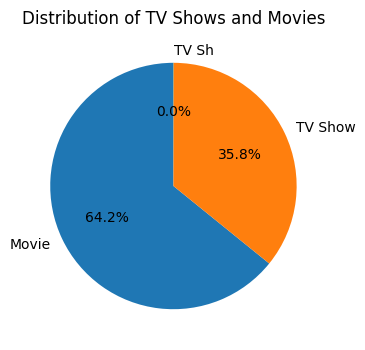

In [ ]:
import matplotlib.pyplot as plt
counts = df['type'].value_counts()
# Create pie chart to see how many movies and tv shows in percentage
plt.figure(figsize=(6, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of TV Shows and Movies')
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#determine the countries top 5 countries with most movies
country_list = pd.DataFrame()
country_list = df['country'].str.split(',',expand = True).stack()
country_list = country_list.to_frame()
print(country_list)
country_list.columns = ['country']
country = country_list.groupby(['country']).size().reset_index(name = "Total Count")
country = country[country['country'] != 'country not specfied']
country = country.sort_values(by=['Total Count'],ascending = False)
top_5_countries = country.head()
print(top_5_countries)


                           0
0    0         United States
1    0          South Africa
2    0  country not specfied
3    0  country not specfied
4    0                 India
...                      ...
5393 0  country not specfied
5394 0           Netherlands
5395 0                Turkey
5396 0                 India
5397 0  country not specfied

[6458 rows x 1 columns]
            country  Total Count
155   United States         1739
110           India          624
154  United Kingdom          298
78    United States          261
115           Japan          211


In [ ]:
radium_colors = ['#FF007F', '#00BFFF', '#FFFF00', '#39FF14', '#8A2BE2']

# Create donut chart with custom radial gradient colors
fig = px.pie(top_5_countries,
             names='country',
             values='Total Count',
             hole=0.4,
             title='Donut Chart of Top 5 Countries by Number of Movies',
             color='country',
             color_discrete_sequence=radium_colors)
fig.update_layout(
    autosize=True,
    margin=dict(l=40, r=40, t=40, b=40),  # Adjust margins as needed
    height=400,  # Set height of the chart
    width=600    # Set width of the chart
)
fig.update_traces(textinfo='label+value',
                  textposition='inside')

fig.update_layout(showlegend=True)
fig.show()

In [ ]:
#Sentiment Analysis of Netflix Content
from textblob import TextBlob
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns={'release_year': 'Release Year', 'description': 'Description'})

# Ensure 'Description' column is of string type and handle NaN values
df3['Description'] = df3['Description'].fillna('').astype(str)

# Initialize a new column for sentiment
df3['Sentiment'] = None

# Perform sentiment analysis
for index, row in df3.iterrows():
    description = row['Description']
    testimonial = TextBlob(description)
    polarity = testimonial.sentiment.polarity
    if polarity == 0:
        sentiment = 'Neutral'
    elif polarity > 0:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'
    df3.at[index, 'Sentiment'] = sentiment

# Group by release year and sentiment, then count occurrences
df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name='Total Count')

# Filter data for release years greater than 2005
df3 = df3[df3['Release Year'] > 2005]

# Create a bar graph
barGraph = px.bar(df3,
                  x="Release Year",
                  y="Total Count",
                  color="Sentiment",
                  title="Sentiment Analysis of Netflix Content",
                  labels={'Total Count': 'Count', 'Release Year': 'Year'},
                  height=400)

# Show the bar graph
barGraph.show()
